In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/minihomeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [ ]:
a=df['bedrooms'].mean()
df['bedrooms'].fillna(a,inplace=True)
a

4.2

In [ ]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
df.tail()

,area,bedrooms,age,price
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [ ]:
x=df.iloc[:,:-1]
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.2,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [ ]:
y=df.iloc[:,-1]
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

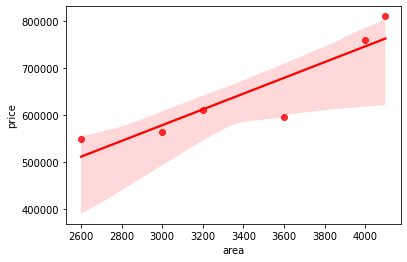

In [ ]:
import seaborn as sns
sns.regplot(x=df['area'],y=y,color='red')


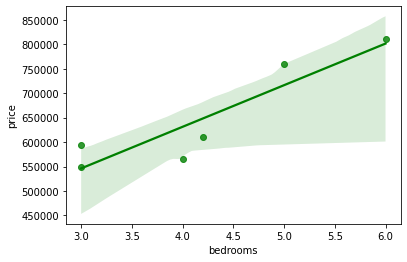

In [ ]:
import seaborn as sns
sns.regplot(x=df['bedrooms'],y=y,color='green')

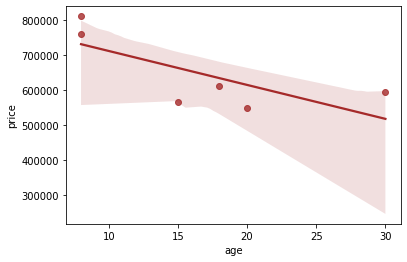

In [ ]:
import seaborn as sns
sns.regplot(x=df['age'],y=y,color='brown')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


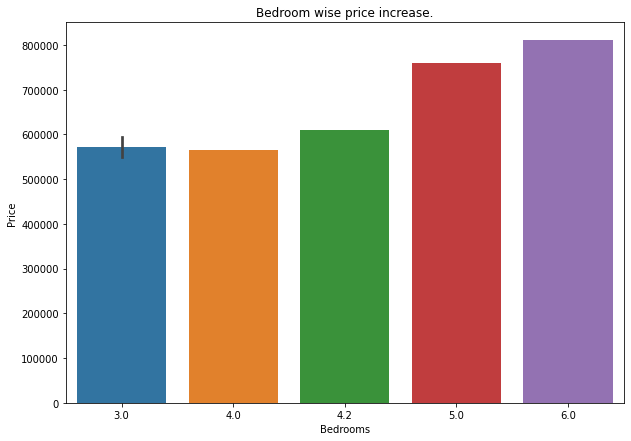

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")

sns.barplot('bedrooms', 'price', data=df)
plt.xlabel('Bedrooms', )
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,area,bedrooms,age
5,4100,6.0,8
2,3200,4.2,18
4,4000,5.0,8
3,3600,3.0,30


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([485028.9017341 , 582355.49132948])

In [ ]:
list(zip(x,model.coef_))
print("constant is",model.intercept_)

constant is 76719.65317918186


In [ ]:
df1=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred})
df1

,Actual_Value,Predicted_Value
0,550000,485028.901734
1,565000,582355.491329


In [ ]:
from sklearn.metrics import mean_absolute_error
print("Error is",mean_absolute_error(y_test,y_pred))

Error is 41163.294797688315


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred))

Percentage error is 0.07442347667167439


In [ ]:
from sklearn.metrics import mean_squared_error
z=mean_squared_error(y_test,y_pred)

In [ ]:
import numpy as np
print(np.sqrt(z))

47552.37475229099


In [ ]:
from sklearn.metrics import r2_score
print("R2 score",r2_score(y_test,y_test))

R2 score 1.0
